In [1]:
import numpy as np
import pandas as pd
import geopandas
import seaborn as sns
import folium
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
%matplotlib inline

Loading BokehJS ...

# Colors

## Custom Colormaps

In [2]:
# categorical
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=4
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c']
# create a colormap from the list of colors
cmap = LinearSegmentedColormap.from_list('cmap', colors=colors)

# sequential single hue
# http://colorbrewer2.org/#type=sequential&scheme=Blues&n=3

seq_colors = ['#deebf7', '#9ecae1', '#3182bd']
# create a colormap from the sequential list of colors
seq_cmap = LinearSegmentedColormap.from_list('seq_cmap', colors=seq_colors)

# Basic Plotting with matplotlib

## matplotlib Introduction
"Matplotlib is a Python 2D plotting library which produces publication-quality figures in a variety of hardcopy formats and interactive environments across platforms."
Check https://matplotlib.org/ and https://github.com/matplotlib/matplotlib for the official documentation and the github repository.

https://matplotlib.org/tutorials/introductory/usage.html provides a good starting point.


## General Concepts

"Everything in matplotlib is organized in a hierarchy. At the top of the hierarchy is the matplotlib "state-machine environment" which is provided by the ```matplotlib.pyplot``` module. At this level, simple functions are used to add plot elements (lines, images, text, etc.) to the current axes in the current figure.

The next level down in the hierarchy is the first level of the object-oriented interface, in which pyplot is used only for a few functions such as figure creation, and the user explicitly creates and keeps track of the figure and axes objects. At this level, the user uses pyplot to create figures, and through those figures, one or more axes objects can be created. These axes objects are then used for most plotting actions."


https://matplotlib.org/3.1.0/tutorials/introductory/usage.html#general-concepts

## Figures and Subplots

The ```Figure``` object is the "top level container for all the plot elements."
https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html


The anatomy of a figure is illustrated in the following image:
![matplotlib_anatomy](img/matplotlib_anatomy.webp)

https://matplotlib.org/tutorials/introductory/usage.html#parts-of-a-figure


Creating a new figure is done with the ```plt.figure``` statement:

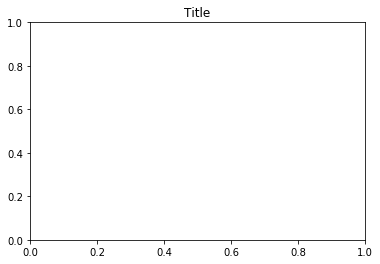

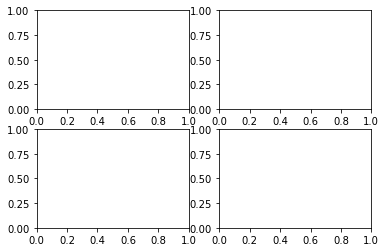

In [3]:
# create an empty figure with no axes
fig = plt.figure()
plt.title("Title")

# add 2x2 grid of Axes
fig, ax_lst = plt.subplots(2, 2)  

## Axes, Axis, and Artist
### Axes

"This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many ```Axes```, but a given Axes object can only be in one ```Figure```. The ```Axes``` contains two (or three in the case of 3D) ```Axis``` objects (be aware of the difference between ```Axes``` and ```Axis```) which take care of the data limits (the data limits can also be controlled via set via the ```set_xlim()``` and ```set_ylim()``` ```Axes``` methods). Each ```Axes``` has a title (set via ```set_title()```), an x-label (set via ```set_xlabel()```), and a y-label set via ```set_ylabel()```)."

https://matplotlib.org/tutorials/introductory/usage.html#axes

### Axis

"These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a ```Locator``` object and the ticklabel strings are formatted by a ```Formatter```. The combination of the correct ```Locator``` and ```Formatter``` gives very fine control over the tick locations and labels

https://matplotlib.org/tutorials/introductory/usage.html#axis

### Artist
"Basically everything you can see on the figure is an artist (even the ```Figure```, ```Axes```, and ```Axis``` objects). This includes ```Text``` objects, ```Line2D``` objects, ```collection``` objects, ```Patch objects``` ... (you get the idea). When the figure is rendered, all of the artists are drawn to the **canvas**. Most ```Artists``` are tied to an ```Axes```; such an ```Artist``` cannot be shared by multiple ```Axes```, or moved from one to another."

https://matplotlib.org/tutorials/introductory/usage.html#artist

## Colors, Markers, and Line Styles
For plotting "y versus x as lines and/or markers" you can use the ```Axes.plot``` function that has the following call signatures:

```python
plot([x], y, [fmt], *, data=None, **kwargs)
plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
```

"The coordinates of the points or line nodes are given by x, y.

The optional parameter *fmt* is a convenient way for defining basic formatting like color, marker and linestyle."

```python
>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses
```

"You can use ```Line2D``` properties as keyword arguments for more control on the appearance. Line properties and fmt can be mixed. The following two calls yield identical results:"

```python
>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y, color='green', marker='o', linestyle='dashed', 
...      linewidth=2, markersize=12)
```
"When conflicting with *fmt*, keyword arguments take precedence."

https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.plot.html

### Colors

"Commands which take color arguments can use several formats to specify the colors. For the basic built-in colors, you can use a single letter:"

| character | color   |
|:----------|:--------|
|'b'        | blue    |
|'g'        | green   |
|'r'        | red     |
|'c'        | cyan    |
|'m'        | magenta |
|'y'        | yellow  |
|'k'        | black   |
|'w'        | white   |

https://matplotlib.org/2.0.2/api/colors_api.html and https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.plot.html

### Markers

| character | description           |
|:----------|:--------------------- |
| '.'       | point marker          |
| ','       | pixel marker          |
| 'o'       | circle marker         |
| 'v'       | triangle_down marker  |
| '^'       | triangle_up marker    |
| '<'       | triangle_left marker  |
| '>'       | triangle_right marker |
| '1'       | tri_down marker       |
| '2'       | tri_up marker         |
| '3'       | tri_left marker       |
| '4'       | tri_right marker      |
| 's'       | square marker         |
| 'p'       | pentagon marker       |
| '*'       | star marker           |
| 'h'       | hexagon1 marker       |
| 'H'       | hexagon2 marker       |
| '+'       | plus marker           |
| 'x'       | x marker              |
| 'D'       | diamond marker        |
| 'd'       | thin_diamond marker   |
| '|'       | vline marker          |
| '_'       | hline marker          |


https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.plot.html

### Line Styles

| character | description         |
|:----------|:--------------------|
| '-'       | solid line style    |
| '--'      | dashed line style   |
| '-.'      | dash-dot line style |
| ':'       | dotted line style   |

https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.plot.html

In [4]:
# data
x = np.arange(0.0, 2.0, 0.01)
y = 1 + np.sin(2 * np.pi * x)

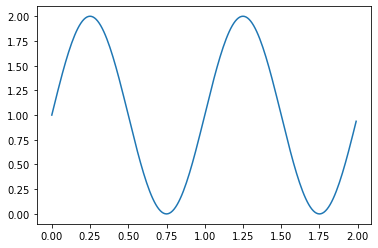

In [5]:
# plot data
plt.plot(x, y)

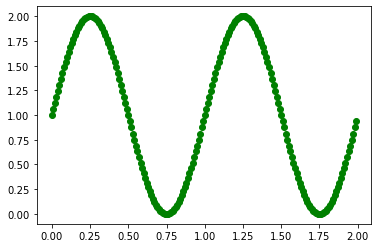

In [6]:
plt.plot(x, y, 'go')

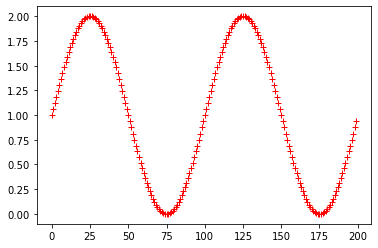

In [7]:
plt.plot(y, 'r+')

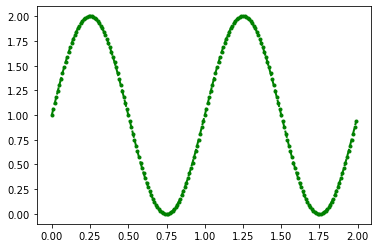

In [8]:
plt.plot(x, y, 'go--', linewidth=2, markersize=3)

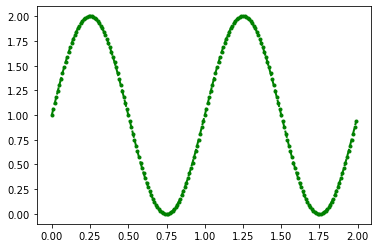

In [9]:
plt.plot(x, y, color='green', marker='o', linestyle='dashed', 
         linewidth=2, markersize=3)

## Ticks, Labels, and Legends

### Ticks and Labels

For plot decorations, matplotlib can be used in two ways:
* the procedural ```pyplot``` interface
* object-oriented native matplotlib API

For getting or setting the tick locations and labels of the x-axis, you can use the following methods:

* using ```matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)```

```python
locs, labels = xticks()            # Get locations and labels
xticks(ticks, [labels], **kwargs)  # Set locations and labels
```

https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.xticks.html

* using ```Axes.get_xticks()``` and ```Axes.get_xticklabels()``` or ```Axes.set_xticks()``` and ```Axes.set_xticklabels()```

See all axis limit and direction methods at https://matplotlib.org/3.1.0/api/axes_api.html#axis-limits-and-direction

All methods have equivalent methods for the y-axis.

[-0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25] <a list of 11 Text xticklabel objects>


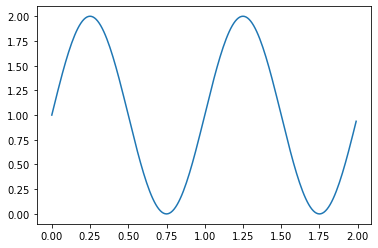

In [10]:
# using the native matplotlib API
# create figure and axes objects
fig, ax = plt.subplots()
ax.plot(x, y)
# get ticks labels and location
locs = ax.get_xticks()
labels = ax.get_xticklabels()
print(locs, labels)

# draw the plot
plt.show()

[-0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25] <a list of 11 Text xticklabel objects>


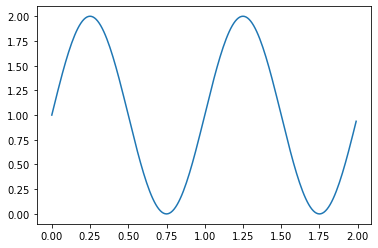

In [11]:
# using the pyplot interface
# plot data
plt.plot(x, y)

locs, labels = plt.xticks()
print(locs, labels)

plt.show()

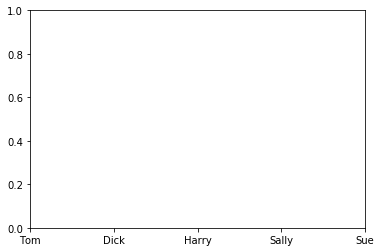

In [12]:
# change the number of ticks and their label
#plt.xticks(np.arange(0, 2, step=0.5))
plt.xticks(np.arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue'))
plt.show()

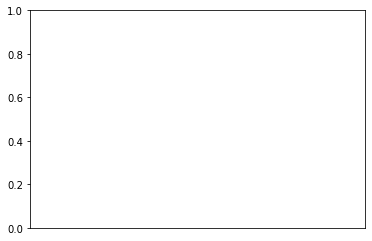

In [13]:
# remove the ticks
plt.xticks([])
plt.show()

### Legends

Labels to the legend can be passed using the *label* argument in the plot function or by calling the ```legend()``` function with the labels. 

Similar to the tick and label functions, there is a ```legend()``` function for ```Axes``` and for ```pyplot```:
* ```Axes.legend()```
* ```pyplot.legend()```

Both functions have the same call signatures:
```python
legend()
legend(labels)
legend(handles, labels)
```

Other parameters that can be passed to the ```legend()``` function are described in the documentation. One important parameter is **loc** for specifiying the location of the legend. The **loc** parameter expects one of the following strings (or location code integers): *'best' (0), 'upper right' (1), 'upper left' (2), 'lower left' (3), 'lower right' (4), 'right' (5), 'center left' (6), 'center right' (7), 'lower center' (8), 'upper center' (9), 'center' (10)*.


See https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.legend.html and https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.legend.html for more information.

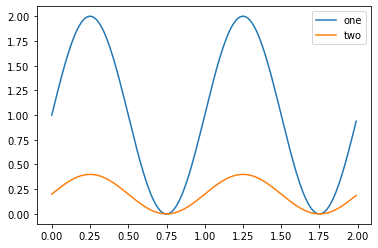

In [14]:
plt.plot(x, y, label='one')
plt.plot(x, y*.2, label='two')
plt.legend(loc='best')
plt.show()

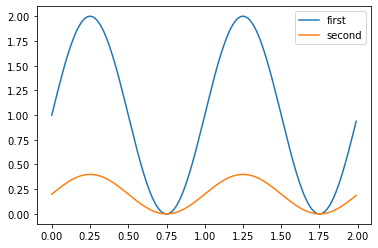

In [15]:
plt.plot(x, y, label='one')
plt.plot(x, y*.2, label='two')
plt.legend(['first', 'second'])
plt.show()

## Annotations and Drawing on a Subplot

The documentation for advanced annotations can be found at https://matplotlib.org/3.1.0/tutorials/text/annotations.html#plotting-guide-annotation. Some important examples are the following:


### Adding text to the axes
Add text to a plot using the ```ax.text()``` function: ```matplotlib.pyplot.text(x, y, s, fontdict=None, **kwargs)```

https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.text.html

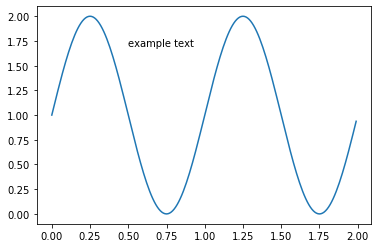

In [16]:
# using the native matplotlib API
# create figure and axes objects
fig, ax = plt.subplots()
ax.plot(x, y)

# add text to the axes
ax.text(0.5, 1.7, 'example text')

# draw the plot
plt.show()

### Annotate text and arrows
The ```ax.annotate()``` function is used for adding text and arrows to the plot: ```matplotlib.pyplot.annotate(s, xy, *args, **kwargs)```

https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.annotate.html

See https://matplotlib.org/3.1.0/tutorials/text/annotations.html#plotting-guide-annotation for a detailed documentation of different arrow styles.

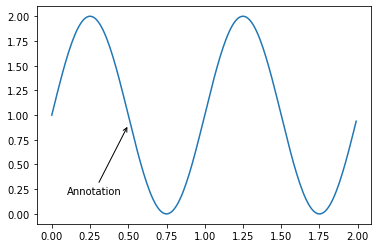

In [17]:
# using the native matplotlib API
# create figure and axes objects
fig, ax = plt.subplots()
ax.plot(x, y)

# add text and arrow to the plot
ax.annotate("Annotation",
            xy=(.5, .9), xycoords='data',
            xytext=(.1, .2), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3")
            )
# draw the plot
plt.show()

### Drawing shapes
Drawing shapes in matplotlib is done with ```matplotlib.patches```. There are predefined classes for drawing shapes such as:
* ```matplotlib.patches.Circle(xy, radius=5, **kwargs)```: https://matplotlib.org/api/_as_gen/matplotlib.patches.Circle.html
* ``` matplotlib.patches.Rectangle(xy, width, height, angle=0.0, **kwargs)```: https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.patches.Rectangle.html
* ```matplotlib.patches.Polygon(xy, closed=True, **kwargs)```: https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.patches.Polygon.html
* ...

See https://matplotlib.org/api/_as_gen/matplotlib.patches.Patch.html and https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.annotate.html for more documentation.

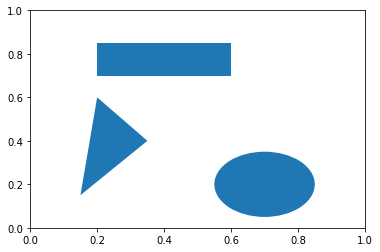

In [18]:
# using the native matplotlib API
# create figure and axes objects
fig, ax = plt.subplots()

# define shapes
rectangle = plt.Rectangle((.2, .7), .4, .15)
circle = plt.Circle((.7, .2), .15)
polygon = plt.Polygon([[.15, .15], [.35, .4], [.2, .6]])

# add shapes to the plot
ax.add_patch(rectangle)
ax.add_patch(circle)
ax.add_patch(polygon)

# draw the plot
plt.show()

## Saving Plots to File
Plots can be saved to files using the ```plt.savefig``` method.

```python
savefig(fname, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
```

The file type is infered from the file extension given in the *fname* parameter.

https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.savefig.html

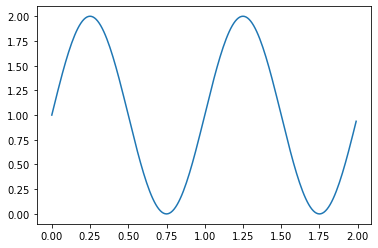

In [19]:
### plot data
plt.plot(x, y)
# save plot to disk
plt.savefig('img/test_file.png')

## Plot types in matplotlib
Matplotlib offers you the functionality to draw many different plots. A list of sample plots can be seen at https://matplotlib.org/3.1.0/tutorials/introductory/sample_plots.html. Some important ones are shown in the following:

### Line Plot

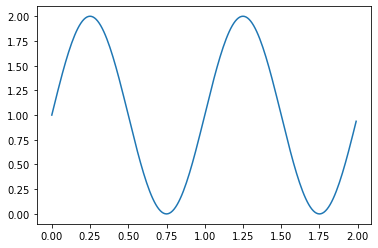

In [20]:
# plot a line plot
# data
x = np.arange(0.0, 2.0, 0.01)
y = 1 + np.sin(2 * np.pi * x)

# plot data
plt.plot(x, y)
plt.show()

### Histogram
Example from https://matplotlib.org/3.1.0/gallery/pyplots/pyplot_text.html.

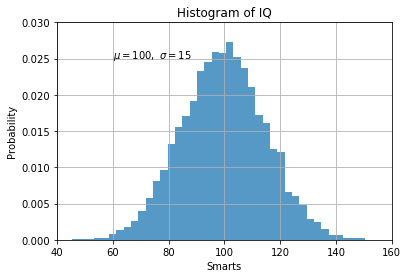

In [21]:
# draw a histogram
# fixed random seed
np.random.seed(23)

# create some data
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# draw histogram of the data
n, bins, patches = plt.hist(x, bins=50, density=True, alpha=0.75)

# add labels, title, text, grid and define axis limits
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

### Bar Chart
Example from https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/bar_stacked.html.

In [22]:
# define data
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)

# the x locations for the groups
N = 5
ind = np.arange(N)
# the width of the bars: can also be len(x) sequence
width = 0.35

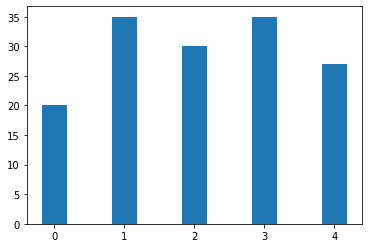

In [23]:
plt.bar(ind, menMeans, width)
plt.show()

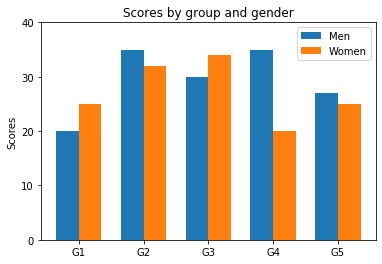

In [24]:
# grouped bar chart
p1 = plt.bar(ind-width/2, menMeans, width)
p2 = plt.bar(ind+width/2, womenMeans, width)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 41, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

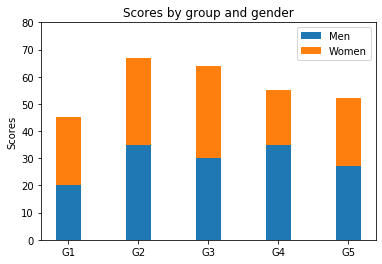

In [25]:
# stacked bar charts
p1 = plt.bar(ind, menMeans, width)
p2 = plt.bar(ind, womenMeans, width, bottom=menMeans)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

### Scatter plots
Drawing scatter plots of y vs x with varying markers size and/or color is documented at https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter.

Example from https://matplotlib.org/3.1.0/gallery/shapes_and_collections/scatter.html.

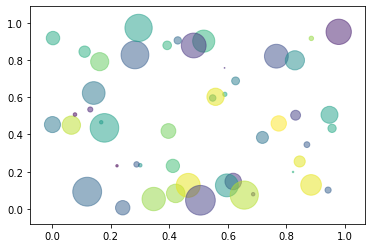

In [26]:
# Fixing random state for reproducibility
np.random.seed(23)

# define data
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
# define colors
colors = np.random.rand(N)
# define scatter point size (radius)
area = (30 * np.random.rand(N))**2

# plot points
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

# Basic Plotting with pandas

You can find detailed instructions of plotting with pandas at https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#plotting and https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html.

## Line Charts
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#basic-plotting-plot

In [27]:
np.random.seed(23)

# create a Series with time on the index and some random values
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2017', periods=1000))
# cumulative sum over the Series axis
ts = ts.cumsum()
ts.head()

2017-01-01    0.666988
2017-01-02    0.692801
2017-01-03   -0.084818
2017-01-04    0.863816
2017-01-05    1.565487
Freq: D, dtype: float64

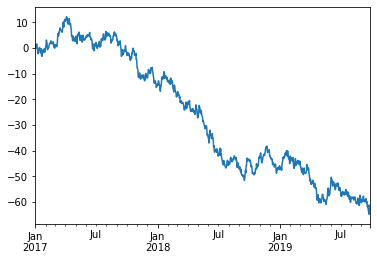

In [28]:
# plot the Series as a line chart
ts.plot()

In [29]:
np.random.seed(23)

# create a DataFrame with the time series as index and four columns
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.head()

,A,B,C,D
2017-01-01,0.666988,0.025813,-0.777619,0.948634
2017-01-02,1.368660,-1.025268,-1.145168,-0.188826
2017-01-03,0.046512,0.746990,-1.492627,0.481314
2017-01-04,0.368784,0.807333,-2.536077,-0.528628
2017-01-05,0.810520,1.936210,-4.374144,-1.467396


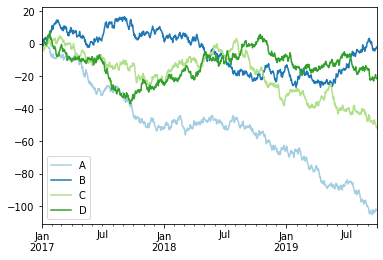

In [30]:
# plot the DataFrame
df.plot(colormap=cmap)

## Area Plot
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#area-plot

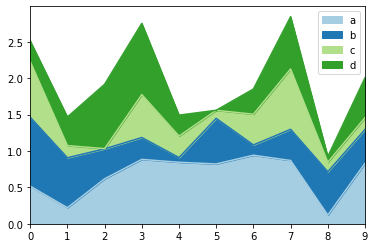

In [31]:
np.random.seed(23)

# create a new DataFrame with only positive values
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

# area plot
df2.plot.area(colormap=cmap)
plt.show()

## Bar charts
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#bar-plots

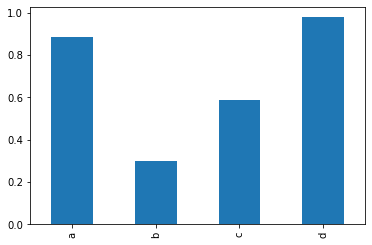

In [32]:
# plotting data row at index 3 as a bar chart
df2.iloc[3].plot(kind='bar')

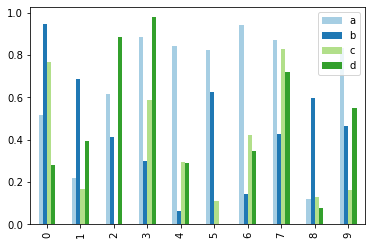

In [33]:
df2.plot.bar(colormap=cmap)

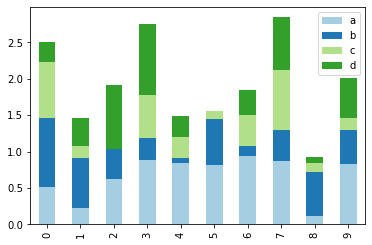

In [34]:
df2.plot.bar(stacked=True, colormap=cmap)

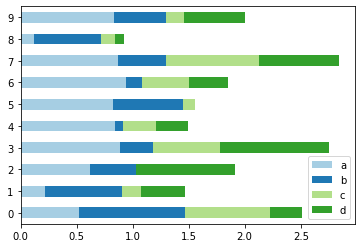

In [35]:
df2.plot.barh(stacked=True, colormap=cmap)

## Histograms
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms

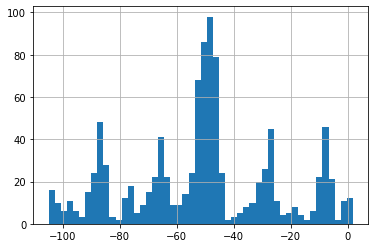

In [36]:
# draw a histogram with 50 bins
df['A'].hist(bins=50)
plt.show()

## Box Plots
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#box-plots

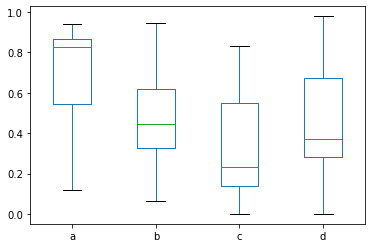

In [37]:
# box plots
df2.plot.box()
plt.show()

## Scatter Plots
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

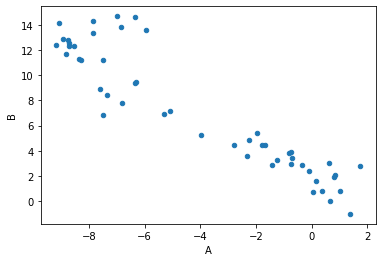

In [38]:
# draw a scatter plot with a subset of the data
df[:50].plot.scatter('A', 'B')

## Plotting Maps

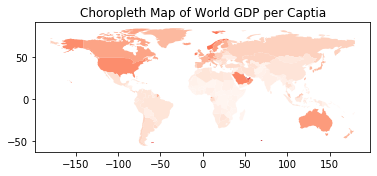

In [39]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap',
           #'pop_est', 
           cmap='Reds')

plt.title('Choropleth Map of World GDP per Captia')
plt.show()

In [40]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",0.009093
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...,0.002791
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...,0.001503
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974...",0.046991
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49....",0.056823


# Other Visualization Libraries

## Seaborn
*statistical data visualization*

"Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics."

https://seaborn.pydata.org/

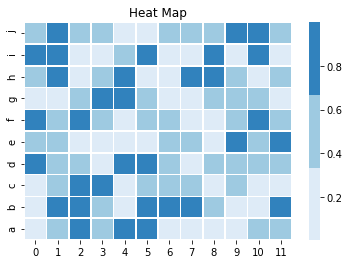

In [41]:
# heatmap
# https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap-with-matplotlib
# https://python-graph-gallery.com/91-customize-seaborn-heatmap/
import seaborn as sns

uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data, linewidth=0.5, cmap=seq_colors, 
                 yticklabels=['j', 'i', 'h', 'g', 'f', 'e', 'd', 'c', 'b', 'a'])

plt.title('Heat Map')

plt.show()

## Bokeh

"Bokeh is an interactive visualization library that targets modern web browsers for presentation. Its goal is to provide elegant, concise construction of versatile graphics, and to extend this capability with high-performance interactivity over very large or streaming datasets. Bokeh can help anyone who would like to quickly and easily create interactive plots, dashboards, and data applications."

https://bokeh.pydata.org/en/latest/

In [42]:
# create a new plot with default tools, using figure
p = figure(plot_width=400, plot_height=400)

# add a circle renderer with x and y coordinates, size, color, and alpha
p.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=15, line_color="navy", fill_color="orange", fill_alpha=0.5)

show(p)

## Folium
"folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via folium."

https://python-visualization.github.io/folium/index.html

In [43]:
# https://python-visualization.github.io/folium/quickstart.html
import folium

m = folium.Map(location=[50.9375, 6.9603], #[52.52, 13.4050],
              tiles='Stamen Toner',
              zoom_start=12)
m

## Even more

![vis_landscape](img/vis_landscape.jpg)

https://www.anaconda.com/python-data-visualization-2018-why-so-many-libraries/

* Plotly: https://plot.ly/python/
* Altair: https://altair-viz.github.io/
* ...

In [3]:
import altair as alt
from vega_datasets import data

# for the notebook only (not for JupyterLab) run this command once per session
#alt.renderers.enable('notebook')

iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

# Exercises
from https://www.w3resource.com/graphics/matplotlib/basic/index.php
1. Write a Python program to draw a line using given axis values with suitable label in the x-axis, y-axis and a title so it looks like the following: ![viz_exercise_1](img/viz_exercise_1.png)
2. Write a Python program to draw line charts of the financial data of Alphabet Inc. between October 3, 2016 to October 7, 2016 using the sample financial data (data/fdata.csv). The result should look similar to the following:  ![viz_exercise_2](img/viz_exercise_2.png)
3. Change the line styles of the previous exercise to the following:
  * Open: dashed line
  * High: dots
  * Low: dash dot line
  * Close: solid line
  The result should look like the following: ![viz_exercise_3](img/viz_exercise_3.png)
4. Create a box plot from the financial data.
5. Create a bar chart from the financial data. The y-axis should limited to values in between 750 and 800. Is it a good idea to limit an axis in that way? Think about consequences in the perception of the data.
6. With the data provided below, create a chart like the following: ![viz_exercise_6](img/viz_exercise_6.png) (hint: the frequency/coherence chart on the bottom is created using the ```cohere()``` function that is documented at https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.cohere.html with the following arguments: NFFT=256, Fs=1./dt)
7. Using the iris dataset and the bokeh library, plot the data as a scatter plot so the chart looks similar to the following: ![viz_exercise_7](img/viz_exercise_7.png)
8. Using the iris dataset and the seaborn library, plot the data using the ```seaborn.kdeplot()``` method so the chart looks like the following: ![viz_exercise_8](img/viz_exercise_8.png) (the documentation to the ```kdeplot()``` method can be found at https://seaborn.pydata.org/generated/seaborn.kdeplot.html)


In [45]:
# data for exercise 6
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2


In [46]:
# data for exercise 7
from bokeh.sampledata.iris import flowers
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
# data for exercise 8
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

print(setosa.head())
print(virginica.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginica
101           5.8          2.7           5.1          1.9  virginica
102           7.1          3.0           5.9          2.1  virginica
103           6.3          2.9           5.6          1.8  virginica
104           6.5          3.0           5.8          2.2  virginica


# Exercise Solutions

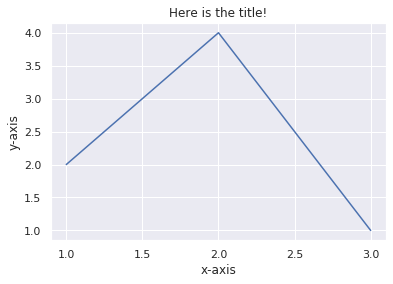

In [48]:
# 1. Write a Python program to draw a line using given axis values with suitable label in the x-axis, 
# y-axis and a title
# https://www.w3resource.com/graphics/matplotlib/basic/matplotlib-basic-exercise-2.php
# x axis values
x = [1,2,3]
# y axis values
y = [2,4,1]
# Plot lines and/or markers to the Axes.
plt.plot(x, y)
# set the number of ticks on the x-axis
plt.xticks(np.arange(1, 3.5, 0.5))
# Set the x axis label of the current axis.
plt.xlabel('x-axis')
# Set the y axis label of the current axis.
plt.ylabel('y-axis')
# Set a title 
plt.title('Here is the title!')
# Display a figure.
plt.show()

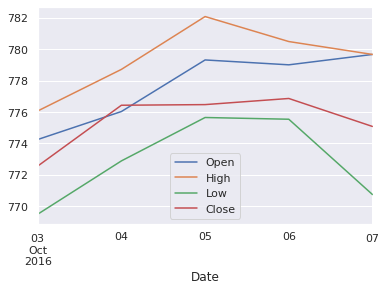

In [49]:
# 2. Write a Python program to draw line charts of the financial data of Alphabet Inc. 
# between October 3, 2016 to October 7, 2016 using the sample financial data (data/fdata.csv).
# https://www.w3resource.com/graphics/matplotlib/basic/matplotlib-basic-exercise-4.php

df = pd.read_csv('data/fdata.csv', sep=',', parse_dates=True, index_col=0)
df.plot()
plt.show()

{'Date': ['10-03-16', '10-04-16', '10-05-16', '10-06-16', '10-07-16'], 'Open': [774.25, 776.030029, 779.309998, 779.0, 779.659973], 'High': [776.065002, 778.710022, 782.070007, 780.47998, 779.659973], 'Low': [769.5, 772.890015, 775.650024, 775.539978, 770.75], 'Close': [772.559998, 776.429993, 776.469971, 776.859985, 775.080017]}


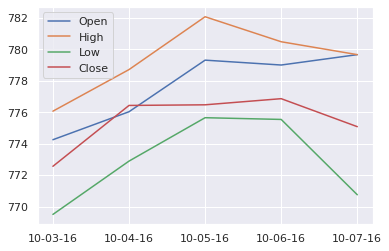

In [50]:
# exercise 2 w/o pandas
data = {}

with open('data/fdata.csv') as f:
    labels = []  # the keys of the data (header)
    c = 0
    for line in f:
        # split values in line by comma and remove last character '\n'
        values = line[:-1].split(',')
        if c == 0:  # header: create new list in the dict with the label as key
            labels = values
            # create an empty list for each key
            for v in values:
                data[v] = []
        else:  # add data to the keys
            for i, v in enumerate(values):
                # convert values to floats
                if i != 0:
                    v = float(v)
                data[labels[i]].append(v)
        c += 1

print(data)

# plot the data
for k in data.keys():
    if k != 'Date':
        plt.plot(data['Date'], data[k], label=k)
plt.legend()
plt.show()

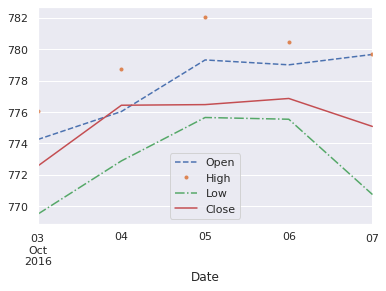

In [51]:
# 3. Change the line styles of the previous exercise to the following:
#  * Open: dashed line
#  * High: dots
#  * Low: dash dot line
#  * Close: solid line

df.plot(style=['--', '.', '-.', '-'])
plt.show()

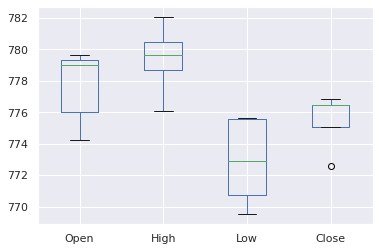

In [52]:
# 4. Create a box plot from the financial data.
df.plot.box()

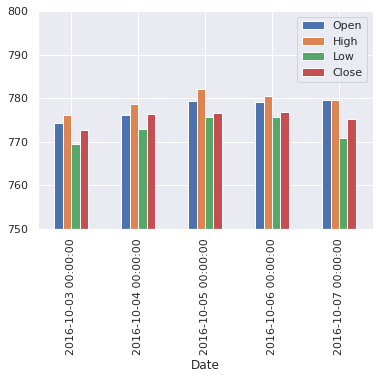

In [53]:
#5. Create a bar chart from the financial data. The y-axis should limited to values in between 750 and 800. 
# Is it a good idea to limit an axis in that way? 
# Think about consequences in the perception of the data.

df.plot.bar(ylim=[750, 800])
plt.show()

Avoid creating charts like the one above. Changing the y-axis so it does not start at 0 is always dangerous because the change in values appears much bigger than it actually is. Especially, if you compare multiple charts that all have different limits on the y-axis. Compare the chart above to the same chart that starts with 0 at the y-axis:

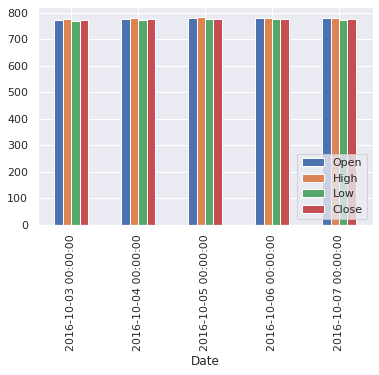

In [54]:
# the same chart where the y-axis starts at 0
# now the changes do not seem that big anymore.
df.plot.bar()
plt.legend(loc='lower right')
plt.show()

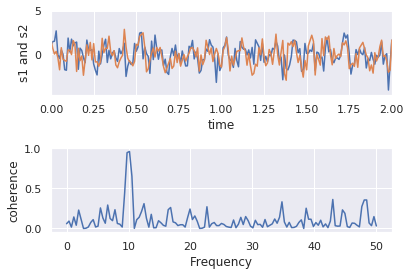

In [55]:
# 6. example from https://matplotlib.org/gallery/lines_bars_and_markers/cohere.html#sphx-glr-gallery-lines-bars-and-markers-cohere-py

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()

In [56]:
# 7. example from https://bokeh.pydata.org/en/latest/docs/gallery/iris.html
#from bokeh.plotting import figure, show
from bokeh.sampledata.iris import flowers

colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [colormap[x] for x in flowers['species']]

p = figure(title = "Iris Morphology")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(flowers["petal_length"], flowers["petal_width"],
         color=colors, fill_alpha=0.2, size=10)

show(p)

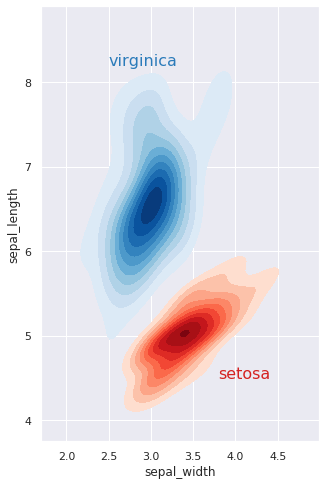

In [57]:
# 8. example from https://seaborn.pydata.org/examples/multiple_joint_kde.html
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)
plt.show()